Reuters Newswires Classifier

In [2]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
# decoding news back to test

word_index = reuters.get_word_index();
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)
print(decoded_newswire)

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [5]:
# Encoding the integer sequences via Multi-Hot encoding

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
print(max(train_labels))
print(len(train_labels))

print(max(test_labels))
print(len(test_labels))

45
8982
45
2246


In [8]:
# Encoding the labels (one-Hot encoding / Categorical encoding)

def to_one_hot(labels, dimension = 46):
  # classifying into 46 mutually exclussive topics
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
      results[i, label] = 1
    return results

In [9]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [10]:
# we can also do the above categorical encoding using to_categorical

# from tensorflow.keras.utils import to_categorical
# y_train1 = to_categorical(train_labels)
# y_test1 = to_categorical(test_labels)

Building the model

In [11]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [12]:
model.compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [14]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 9,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/9
16/16 [==============================] - 2s 78ms/step - loss: 2.9253 - accuracy: 0.4679 - val_loss: 1.9243 - val_accuracy: 0.5930
Epoch 2/9
16/16 [==============================] - 1s 74ms/step - loss: 1.5811 - accuracy: 0.6793 - val_loss: 1.3836 - val_accuracy: 0.7020
Epoch 3/9
16/16 [==============================] - 1s 88ms/step - loss: 1.1840 - accuracy: 0.7410 - val_loss: 1.2052 - val_accuracy: 0.7440
Epoch 4/9
16/16 [==============================] - 1s 81ms/step - loss: 0.9662 - accuracy: 0.7918 - val_loss: 1.1109 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 1s 80ms/step - loss: 0.8085 - accuracy: 0.8218 - val_loss: 1.0285 - val_accuracy: 0.7810
Epoch 6/9
16/16 [==============================] - 1s 87ms/step - loss: 0.6809 - accuracy: 0.8498 - val_loss: 0.9867 - val_accuracy: 0.7910
Epoch 7/9
16/16 [==============================] - 1s 79ms/step - loss: 0.5750 - accuracy: 0.8747 - val_loss: 0.9474 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

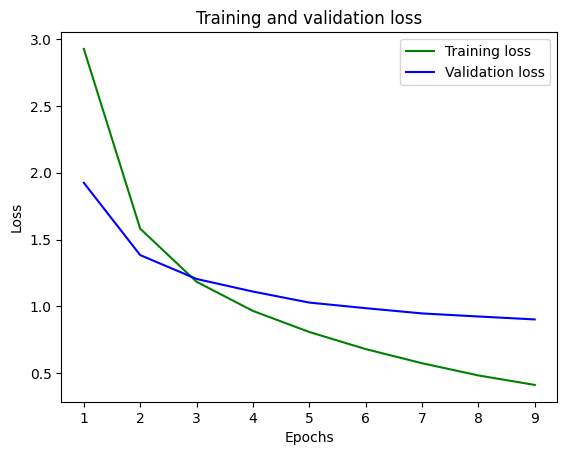

In [15]:
 loss = history.history["loss"]
 val_loss = history.history["val_loss"]
 epochs = range(1, len(loss) + 1)
 plt.plot(epochs, loss, "g", label="Training loss")
 plt.plot(epochs, val_loss, "b", label="Validation loss")
 plt.title("Training and validation loss")
 plt.xlabel("Epochs")
 plt.ylabel("Loss")
 plt.legend()
 plt.show()

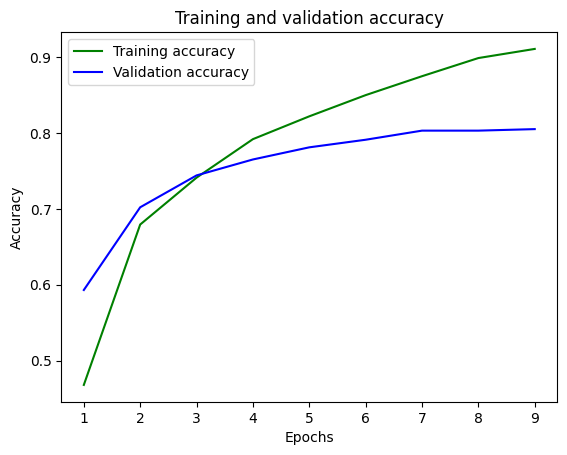

In [16]:
 acc = history.history["accuracy"]
 val_acc = history.history["val_accuracy"]
 plt.plot(epochs, acc, "g", label="Training accuracy")
 plt.plot(epochs, val_acc, "b", label="Validation accuracy")
 plt.title("Training and validation accuracy")
 plt.xlabel("Epochs")
 plt.ylabel("Accuracy")
 plt.legend()
 plt.show()

In [17]:
 results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 6ms/step - loss: 0.9771 - accuracy: 0.7787


In [18]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 8ms/step


In [19]:
# predictions[0] is a vector of length 46
print(np.sum(predictions[0]))

#class with highest probability in predictions[0]
print(np.argmax(predictions[0]))

#lets check that in y_test
print(y_test[0])

0.99999994
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
